In [182]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [183]:
# Load the run history data and fix coltypes:
df = pd.read_pickle('runHist.pkl')
colTypes = {'qV': float, 'reward': float,'alpha':float, 'deadline':int}
for c in colTypes:
    df[c] = df[c].apply(lambda x: colTypes[c](x)) 

# Create some reporting features
df['Error'] = df['reward'].apply(lambda x: 1 if x < 0 else 0)


In [184]:
df[(df['trip']>=50) & (df['reward'] < 0)]

,trip,light,opposing,oncoming,left,right,next_waypoint,action,qA,qV,reward,alpha,deadline,Explored,Error


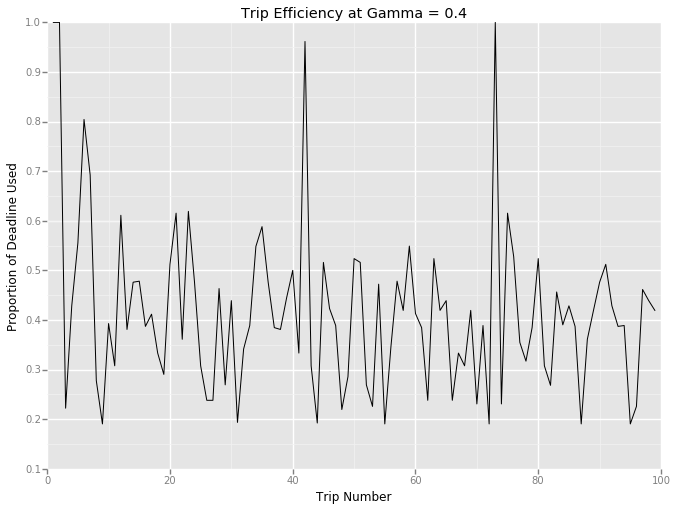

<ggplot: (36270557)>

In [185]:
temp = df.groupby(['trip']).agg({'deadline':'max','light':'count'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp['light']/temp['deadline']
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip',y='UtilizedMoves')) + geom_line() + ggtitle('Trip Efficiency at Gamma = 0.4') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

In [186]:
temp.mean()
# 0.5, 0.5 - 0.4494

trip             50.000000
light            13.121212
deadline         30.848485
UtilizedMoves     0.416818
dtype: float64

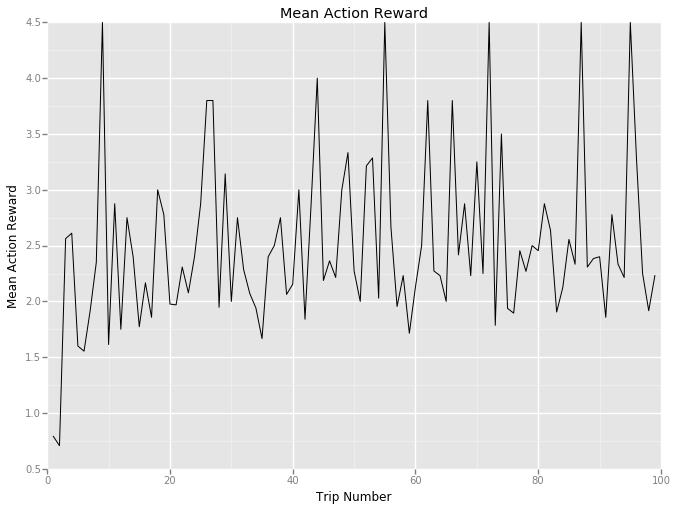

<ggplot: (34374053)>

In [187]:
tempq = df.groupby(['trip'])['reward'].mean().reset_index()
ggplot(tempq, aes(x='trip', y='reward')) + geom_line() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

In [188]:
# 0.5, 0.5 - 2.3768
tempq.mean()

trip      50.000000
reward     2.500555
dtype: float64

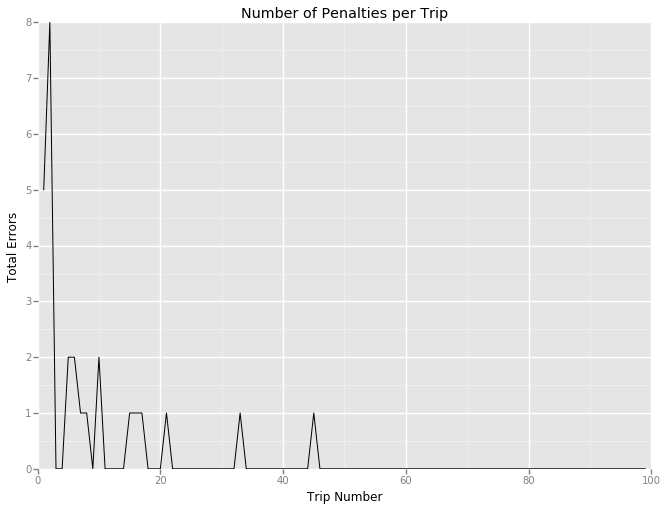

<ggplot: (33736596)>

In [189]:
tempq = df.groupby(['trip'])['Error'].sum().reset_index()
ggplot(tempq, aes(x='trip', y='Error')) + geom_line() + ggtitle('Number of Penalties per Trip') + xlab('Trip Number') + ylab('Total Errors')


In [190]:
tempq.mean()
# 0.5, 0.5 -  0.292929

trip     50.000000
Error     0.272727
dtype: float64